In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
model_path='C:/Users/LENOVO/Desktop/PYTHON Program/CNN/saved_model'

In [4]:
#load data
X=np.load('features.npy')
y=np.load('labels.npy')
X = X/255.0

In [5]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
print(len(X_train))

17462


In [7]:
print(y[:10])

[1 0 1 1 1 1 0 1 0 0]


In [69]:
from keras.layers import BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [70]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 58, 58, 32)        320       
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 58, 58, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 27, 27, 64)        256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)      

In [102]:
model.save('C:/Users/LENOVO/Desktop/PYTHON Program/CNN/saved_model')

INFO:tensorflow:Assets written to: C:/Users/LENOVO/Desktop/PYTHON Program/CNN/saved_model\assets


In [88]:
#coninue training
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 18s 26ms/step - loss: 0.3291 - accuracy: 0.8577 - val_loss: 0.3541 - val_accuracy: 0.8413
Epoch 2/10
702/702 [==============================] - 20s 28ms/step - loss: 0.3118 - accuracy: 0.8654 - val_loss: 0.3575 - val_accuracy: 0.8445
Epoch 3/10
702/702 [==============================] - 20s 28ms/step - loss: 0.2937 - accuracy: 0.8756 - val_loss: 0.4348 - val_accuracy: 0.8100
Epoch 4/10
702/702 [==============================] - 20s 28ms/step - loss: 0.2916 - accuracy: 0.8771 - val_loss: 0.4983 - val_accuracy: 0.7719
Epoch 5/10
702/702 [==============================] - 21s 29ms/step - loss: 0.2761 - accuracy: 0.8841 - val_loss: 0.3785 - val_accuracy: 0.8349
Epoch 6/10
702/702 [==============================] - 20s 28ms/step - loss: 0.2647 - accuracy: 0.8886 - val_loss: 0.4228 - val_accuracy: 0.7908
Epoch 7/10
702/702 [==============================] - 20s 28ms/step - loss: 0.2567 - accuracy: 0.8925 - val_loss: 0.3572 - val_accuracy:

In [89]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32)
model.evaluate(test_dataset)

234/234 [==============================] - 2s 7ms/step - loss: 0.2387 - accuracy: 0.9212


[0.2386896312236786, 0.9211651682853699]

In [54]:
#load model
model=keras.models.load_model(model_path)

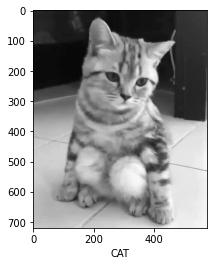

predict output : 0.07617104


In [99]:
# predict
import matplotlib.pyplot as plt
import cv2
Categories=['Cat','Dog']
img_path='C:/Users/LENOVO/Desktop/PYTHON Program/CNN/test/test (7).jpg'
img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
img=cv2.resize(img,(60,60))

pred=model.predict(img.reshape(-1,60,60,1)/255.0)
if pred[0,0]>=0.5:
    plt.xlabel("DOG")
else:
    plt.xlabel("CAT")
plt.show()
print("predict output : " + str(pred[0,0]))

#close to 0 is Cat
#close to 1 is Dog

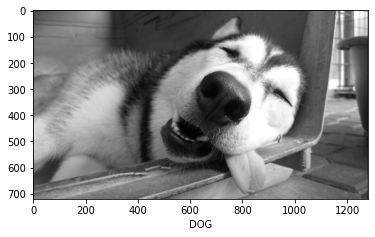

predict output : 0.96725816


In [101]:
img_path='C:/Users/LENOVO/Desktop/PYTHON Program/CNN/test/test.jpg'
img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
img=cv2.resize(img,(60,60))

pred=model.predict(img.reshape(-1,60,60,1)/255.0)
if pred[0,0]>=0.5:
    plt.xlabel("DOG")
else:
    plt.xlabel("CAT")
plt.show()
print("predict output : " + str(pred[0,0]))

#close to 0 is Cat
#close to 1 is Dog